In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-moststreamed-songs-on-spotify/List of most-streamed songs on Spotify.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('/kaggle/input/list-of-moststreamed-songs-on-spotify/List of most-streamed songs on Spotify.csv')


# Data cleansing:

In [32]:
df['Streams (Billions)']=df['Streams (Billions)'].str.replace(',','')
df['Streams (Billions)']=df['Streams (Billions)'].astype('int')


In [34]:
df['Release Date']=df['Release Date'].astype('datetime64[ns]')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    int64         
 1   Song                100 non-null    object        
 2   Streams (Billions)  100 non-null    int64         
 3   Artist              100 non-null    object        
 4   Release Date        100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB


In [36]:
df.head()

,Rank,Song,Streams (Billions),Artist,Release Date
0,1,Shape of You,3327,Ed Sheeran,2017-01-06
1,2,Blinding Lights,3323,The Weeknd,2019-11-29
2,3,Dance Monkey,2721,Tones And I,2019-05-10
3,4,Someone You Loved,2588,Lewis Capaldi,2018-11-08
4,5,Rockstar,2570,Post Malone featuring 21 Savage,2017-09-15


In [62]:
art=df[['Artist','Streams (Billions)']].groupby('Artist').sum()
art=art.sort_values(by='Streams (Billions)',ascending=False)
art=art.head(5)

In [55]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [186]:
plt.style.use('Solarize_Light2')

<AxesSubplot:title={'center':'Top 5 artists by Streams count '}, xlabel='Artist'>

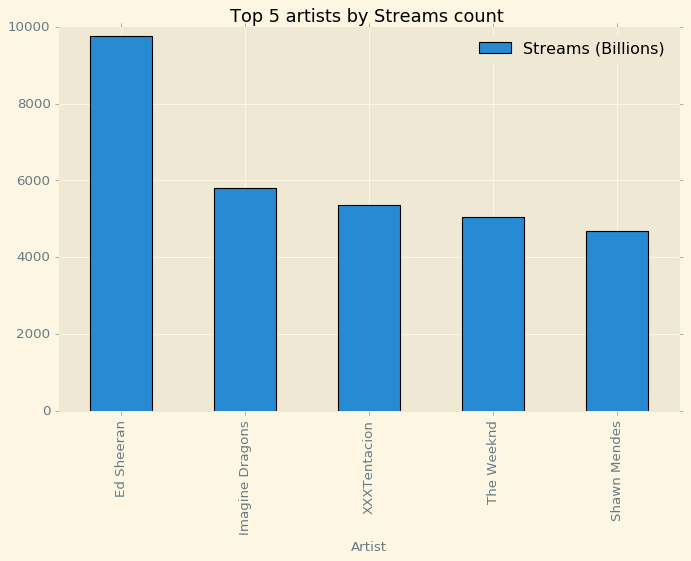

In [187]:
plt.style.use('Solarize_Light2')
art.plot(kind='bar',figsize=(10,6),title='Top 5 artists by Streams count ',edgecolor ='black')

**Ed Sheeran has the highest straming counts.**

In [121]:
sng=df[['Song','Streams (Billions)']]
sng=sng.sort_values(by='Streams (Billions)',ascending=False)
sng=sng.head(5)

<AxesSubplot:title={'center':'Top 5 Songs by Streams count '}, ylabel='Song'>

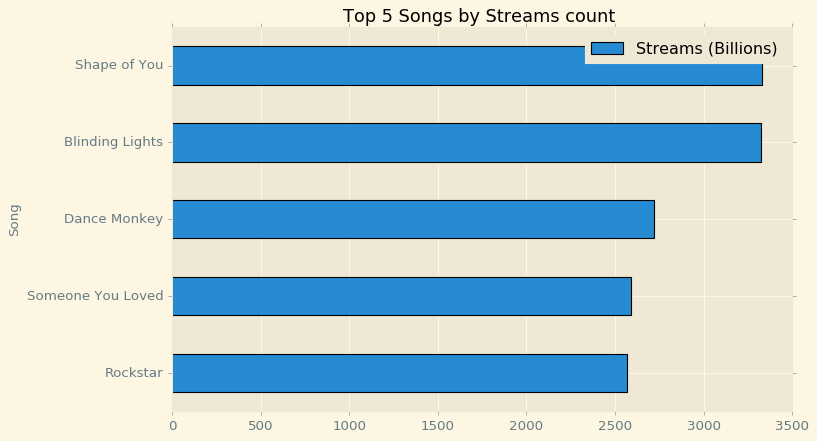

In [188]:
sng=pd.pivot_table(sng,index='Song',values='Streams (Billions)')
sng=sng.sort_values(by='Streams (Billions)',ascending=True)
sng.plot(kind='barh',figsize=(10,6),title='Top 5 Songs by Streams count ',edgecolor = 'black')

**Shape of you by Ed Sheeran has the highest streaming count ever**

**Stream count Distribution:**

<AxesSubplot:title={'center':'Stream count Distribution'}, ylabel='Frequency'>

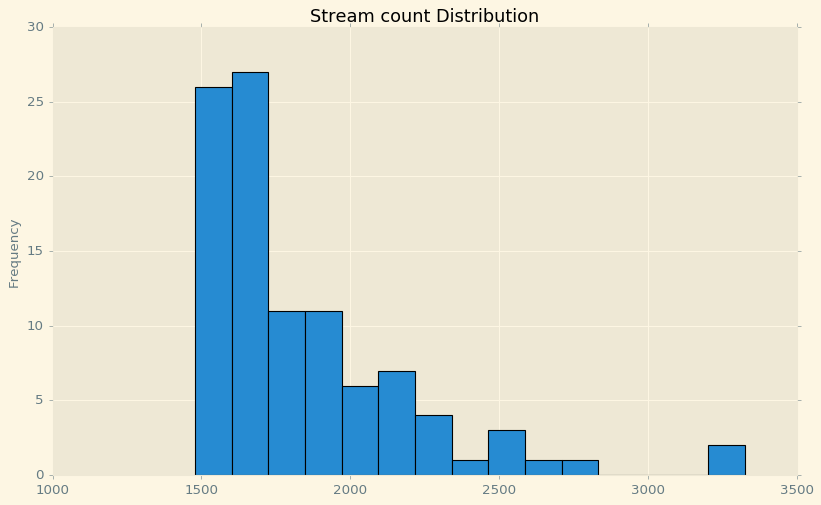

In [213]:
stream=df['Streams (Billions)']
stream.plot(kind='hist',figsize=(12,7),bins=15,edgecolor = 'black',title='Stream count Distribution')

**Year extracting:**

In [131]:
df['year'] = pd.DatetimeIndex(df['Release Date']).year

**The Song of the year for the last 47 years**

In [181]:
year=df[['year','Song','Streams (Billions)']]
year=year.sort_values('Streams (Billions)').drop_duplicates('year',keep='last')
year.sort_values('year')

,year,Song,Streams (Billions)
23,1975,Bohemian Rhapsody,2006
97,1991,Smells Like Teen Spirit,1487
84,1995,Wonderwall,1542
73,2002,Lose Yourself,1605
71,2004,Mr. Brightside,1613
95,2008,I'm Yours,1490
50,2011,Can't Hold Us,1702
31,2012,Sweater Weather,1899
29,2013,Take Me to Church,1916
15,2014,Thinking Out Loud,2131


**Average streaming count over the years:**

<AxesSubplot:title={'center':'Average streaming count over the years'}, xlabel='year'>

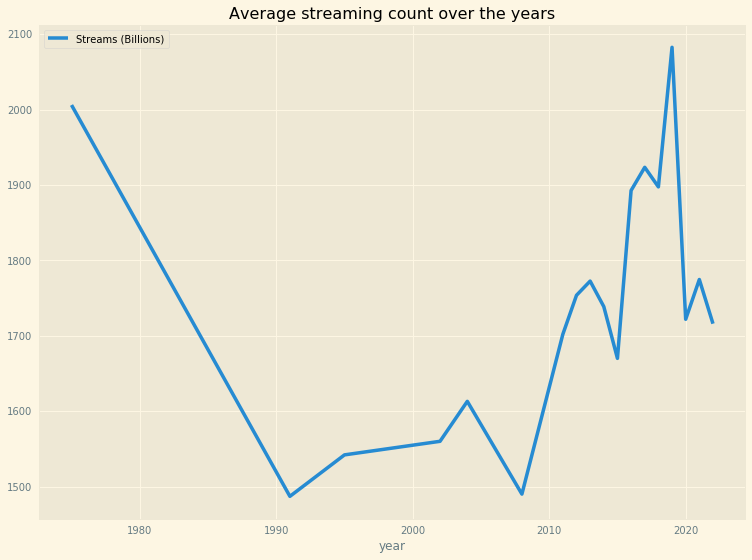

In [158]:
year=pd.pivot_table(df,index=['year'],values='Streams (Billions)',aggfunc="mean")
year.plot(kind='line',linewidth=3.5,figsize=(10,7),title='Average streaming count over the years')

**Streaming counts is increasing over years**

**Data correlation:**

<AxesSubplot:>

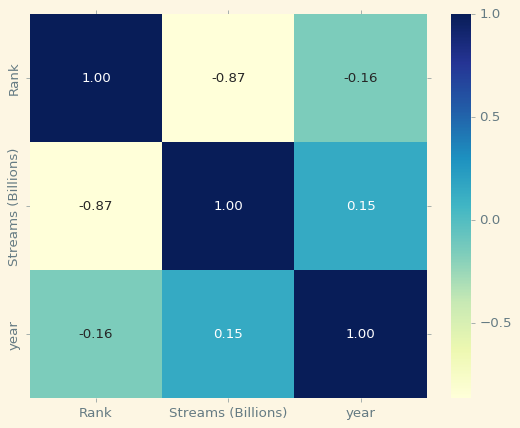

In [190]:
plt.style.use('Solarize_Light2')
sns.heatmap(df.corr(),annot = True, cmap= 'YlGnBu', fmt= '.2f')

**Release Year has a small impact on the streaming count**

array([<AxesSubplot:title={'center':'Song'}, xlabel='Artist'>],
      dtype=object)

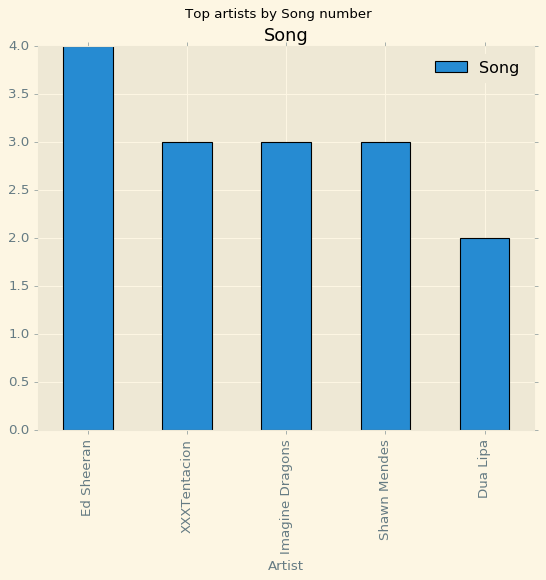

In [206]:
art1=df[['Artist','Song']].groupby('Artist').count()
art1=art1.sort_values('Song',ascending=False)
art1=art1.head()
art1.plot(kind='bar',subplots=True,title='Top artists by Song number')

**Again, Ed sheeran has the highest number of song in this playlist**

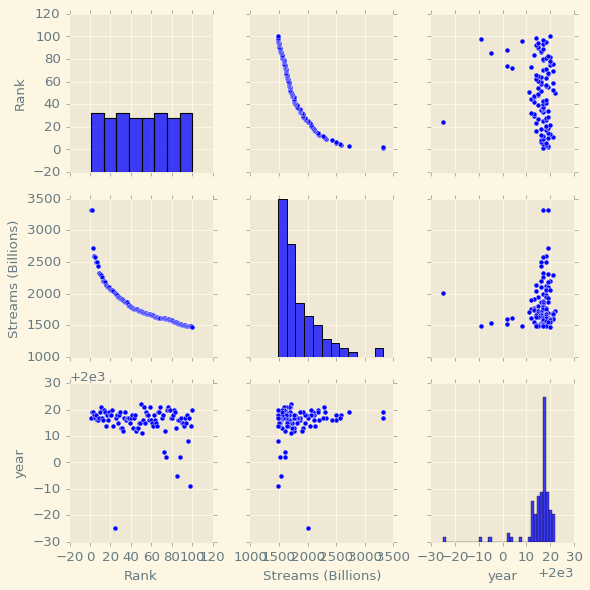

In [210]:
sns.pairplot(df)

**If you like this notebook, don't forget to upvote it!
Thank you!**